## SVM


⚙️ Training Support Vector Machine...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
✅ Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

🔍 SVM Validation:
              precision    recall  f1-score   support

           5       0.84      0.84      0.84        63
           6       0.87      0.73      0.79        66
           7       0.66      0.48      0.55        61
           8       0.48      0.80      0.60        41

    accuracy                           0.71       231
   macro avg       0.71      0.71      0.70       231
weighted avg       0.74      0.71      0.71       231

✅ Accuracy: 0.7056277056277056

📊 SVM Test:
              precision    recall  f1-score   support

           5       0.79      0.88      0.83        72
           6       0.80      0.63      0.70        62
           7       0.68      0.66      0.67        67
           8       0.71      0.76      0.73        88

    accuracy                           0.74       289
   macro av

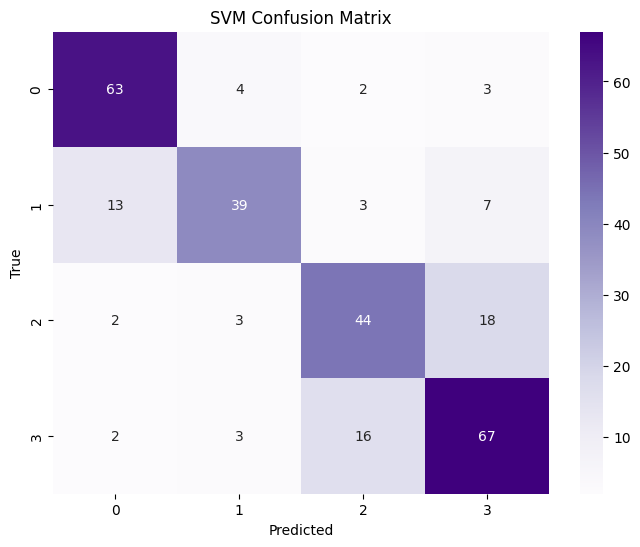

In [1]:
import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract color histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))  # Resize to standard size
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Load data
main_dir = "Split_Data"
data = []
labels = []

for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)
                match = re.search(r'pH(\d+)', file)
                if match:
                    pH = int(match.group(1))
                    features = extract_features(full_path)
                    if features is not None:
                        data.append(features)
                        labels.append(pH)
                else:
                    print(f"Could not extract pH from: {file}")

# Convert to numpy arrays
X = np.array(data)
y = np.array(labels)

# Split data
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)


# -------------------------- SVM --------------------------
print("\n⚙️ Training Support Vector Machine...")
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print(f"✅ Best SVM Params: {grid_svm.best_params_}")

val_preds_svm = best_svm.predict(X_val)
print("\n🔍 SVM Validation:")
print(classification_report(y_val, val_preds_svm))
print("✅ Accuracy:", accuracy_score(y_val, val_preds_svm))

test_preds_svm = best_svm.predict(X_test)
print("\n📊 SVM Test:")
print(classification_report(y_test, test_preds_svm))
print("✅ Accuracy:", accuracy_score(y_test, test_preds_svm))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, test_preds_svm), annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Random Forest

🔍 Validation Metrics:
              precision    recall  f1-score   support

           5       0.90      0.90      0.90        63
           6       0.91      0.77      0.84        66
           7       0.72      0.64      0.68        61
           8       0.57      0.80      0.67        41

    accuracy                           0.78       231
   macro avg       0.78      0.78      0.77       231
weighted avg       0.80      0.78      0.78       231

✅ Validation Accuracy: 0.7792207792207793

📊 Test Metrics:
              precision    recall  f1-score   support

           5       0.87      0.85      0.86        72
           6       0.81      0.76      0.78        62
           7       0.72      0.69      0.70        67
           8       0.77      0.85      0.81        88

    accuracy                           0.79       289
   macro avg       0.79      0.79      0.79       289
weighted avg       0.79      0.79      0.79       289

✅ Test Accuracy: 0.7923875432525952


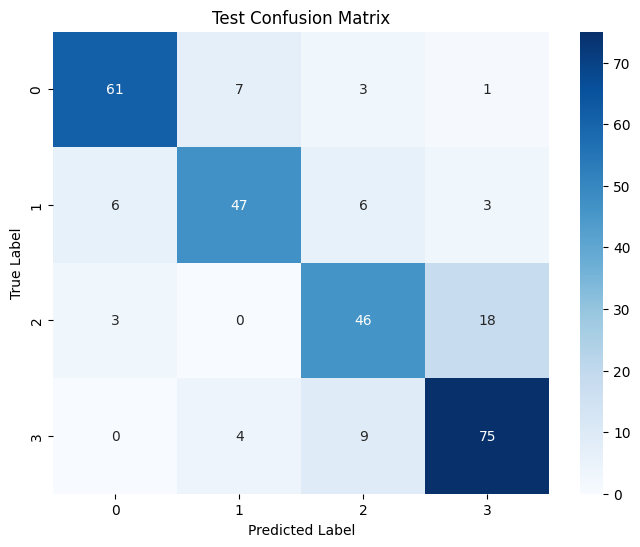

In [3]:
import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


# Function to extract color histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))  # Resize to standard size
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Main paths
main_dir = "Split_Data"
data = []
labels = []

# Load image data and labels
for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)

                # Extract pH value from filename
                match = re.search(r'pH(\d+)', file)
                if match:
                    pH = int(match.group(1))
                    features = extract_features(full_path)
                    if features is not None:
                        data.append(features)
                        labels.append(pH)
                else:
                    print(f"Could not extract pH from: {file}")

# Convert to arrays
X = np.array(data)
y = np.array(labels)

# Train/validation/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
}

# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Validation evaluation
val_preds = clf.predict(X_val)
print("🔍 Validation Metrics:")
print(classification_report(y_val, val_preds))
print("✅ Validation Accuracy:", accuracy_score(y_val, val_preds))

# Test evaluation
test_preds = clf.predict(X_test)
print("\n📊 Test Metrics:")
print(classification_report(y_test, test_preds))
print("✅ Test Accuracy:", accuracy_score(y_test, test_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Grid Search

In [4]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

best_rf = grid_search.best_estimator_

val_preds_grid = best_rf.predict(X_val)
val_acc_grid = accuracy_score(y_val, val_preds_grid)
print("🔍 Grid Search RF - Validation Accuracy:", val_acc_grid)

test_preds_grid = best_rf.predict(X_test)
test_acc_grid = accuracy_score(y_test, test_preds_grid)
print("📊 Grid Search RF - Test Accuracy:", test_acc_grid)

print("📄 Grid Search RF - Test Classification Report:")
print(classification_report(y_test, test_preds_grid))

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
🔍 Grid Search RF - Validation Accuracy: 0.7878787878787878
📊 Grid Search RF - Test Accuracy: 0.8027681660899654
📄 Grid Search RF - Test Classification Report:
              precision    recall  f1-score   support

           5       0.90      0.83      0.86        72
           6       0.81      0.74      0.77        62
           7       0.73      0.76      0.74        67
           8       0.79      0.85      0.82        88

    accuracy                           0.80       289
   macro avg       0.81      0.80      0.80       289
weighted avg       0.81      0.80      0.80       289



## RF+Time

❌ XGBoost not available. Using RandomForest instead.
🌲 Using RandomForest Classifier

🔍 Validation Metrics:
              precision    recall  f1-score   support

           5       0.92      0.87      0.89        63
           6       0.88      0.80      0.84        66
           7       0.73      0.66      0.69        61
           8       0.59      0.80      0.68        41

    accuracy                           0.78       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.80      0.78      0.79       231

✅ Validation Accuracy: 0.7835497835497836

📊 Test Metrics:
              precision    recall  f1-score   support

           5       0.90      0.86      0.88        72
           6       0.84      0.76      0.80        62
           7       0.72      0.73      0.73        67
           8       0.80      0.88      0.84        88

    accuracy                           0.81       289
   macro avg       0.82      0.81      0.81       289
weighted avg      

/var/folders/25/byfj08qs0vd_p5mct4_8s7fr0000gn/T/ipykernel_96556/3191217688.py:105: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


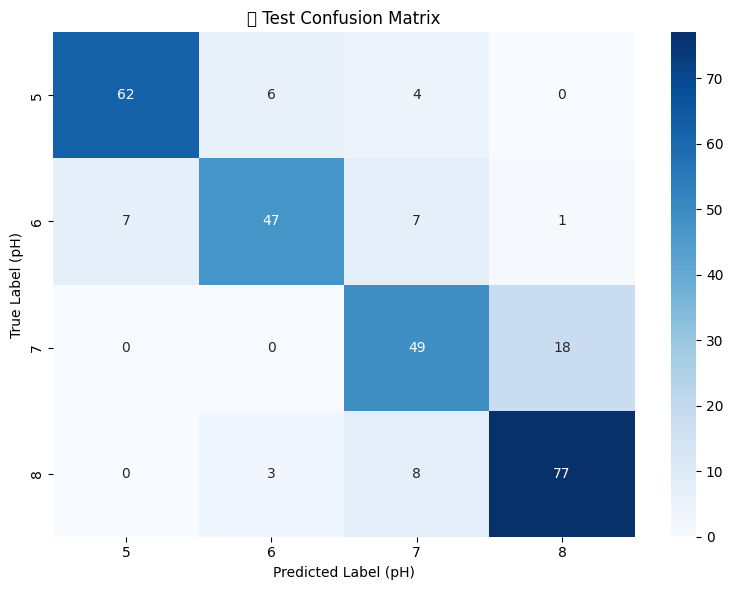

In [5]:
import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Try importing XGBoost
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    print("❌ XGBoost not available. Using RandomForest instead.")
    xgb_available = False

# Function to extract color histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))  # Resize to standard size
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Paths
main_dir = "Split_Data"
data = []
labels = []

# Load data
for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)

                match = re.search(r'pH(\d+)', file)
                if match:
                    pH = int(match.group(1))
                    features = extract_features(full_path)
                    if features is not None:
                        data.append(features)
                        labels.append(pH)
                else:
                    print(f"Could not extract pH from: {file}")

# Convert to arrays
X = np.array(data)
y_raw = np.array(labels)

# Encode labels to start from 0
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Split data
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Choose model
if xgb_available:
    clf = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    print("📦 Using XGBoost Classifier")
else:
    clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
    print("🌲 Using RandomForest Classifier")

# Fit
clf.fit(X_train, y_train)

# Validation metrics
val_preds = clf.predict(X_val)
print("\n🔍 Validation Metrics:")
print(classification_report(y_val, val_preds, target_names=le.classes_.astype(str)))
print("✅ Validation Accuracy:", accuracy_score(y_val, val_preds))

# Test metrics
test_preds = clf.predict(X_test)
print("\n📊 Test Metrics:")
print(classification_report(y_test, test_preds, target_names=le.classes_.astype(str)))
print("✅ Test Accuracy:", accuracy_score(y_test, test_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("🧪 Test Confusion Matrix")
plt.xlabel("Predicted Label (pH)")
plt.ylabel("True Label (pH)")
plt.tight_layout()
plt.show()

🔍 Validation Metrics:
              precision    recall  f1-score   support

           5       0.92      0.90      0.91        63
           6       0.89      0.83      0.86        66
           7       0.75      0.66      0.70        61
           8       0.56      0.73      0.63        41

    accuracy                           0.79       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.80      0.79      0.79       231

✅ Validation Accuracy: 0.7878787878787878

📊 Test Metrics:
              precision    recall  f1-score   support

           5       0.90      0.85      0.87        72
           6       0.83      0.77      0.80        62
           7       0.73      0.72      0.72        67
           8       0.76      0.84      0.80        88

    accuracy                           0.80       289
   macro avg       0.80      0.79      0.80       289
weighted avg       0.80      0.80      0.80       289

✅ Test Accuracy: 0.7993079584775087


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


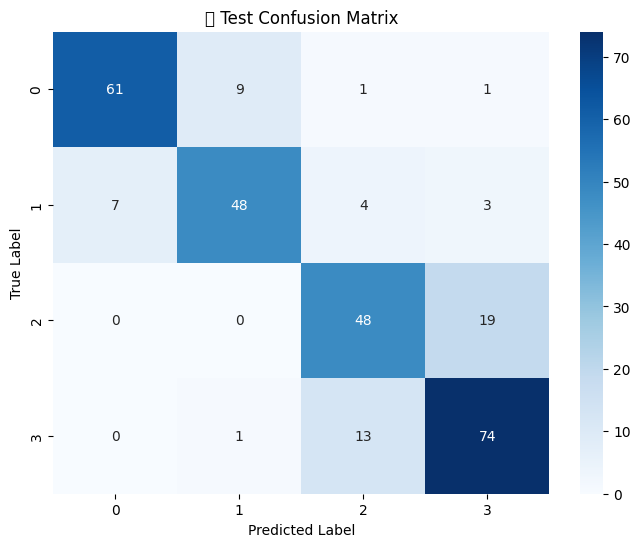

In [6]:
import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Extract color histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Extract time in hours from folder path (e.g., '0 hr', '24 hr', etc.)
def extract_time_from_path(path):
    match = re.search(r'(\d+)\s*hr', path)
    return int(match.group(1)) if match else None

# Main paths
main_dir = "Split_Data"
data = []
labels = []

# Load image data and labels
for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)

                # Extract pH value from filename
                pH_match = re.search(r'pH(\d+)', file)
                if not pH_match:
                    print(f"⚠️ Could not extract pH from: {file}")
                    continue
                pH = int(pH_match.group(1))

                # Extract time from folder structure
                time = extract_time_from_path(root)
                if time is None:
                    print(f"⚠️ Could not extract time from path: {root}")
                    continue

                # Extract histogram features
                features = extract_features(full_path)
                if features is not None:
                    # Append time as an additional feature
                    features_with_time = np.append(features, time)
                    data.append(features_with_time)
                    labels.append(pH)

# Convert to arrays
X = np.array(data)
y = np.array(labels)

# Train/val/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Model training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Validation evaluation
val_preds = clf.predict(X_val)
print("🔍 Validation Metrics:")
print(classification_report(y_val, val_preds))
print("✅ Validation Accuracy:", accuracy_score(y_val, val_preds))

# Test evaluation
test_preds = clf.predict(X_test)
print("\n📊 Test Metrics:")
print(classification_report(y_test, test_preds))
print("✅ Test Accuracy:", accuracy_score(y_test, test_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("🧪 Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## RESNET+RF

Epoch 1/15 - Loss: 30.3069, Accuracy: 0.6252
Epoch 2/15 - Loss: 13.4101, Accuracy: 0.8491
Epoch 3/15 - Loss: 8.8310, Accuracy: 0.8975
Epoch 4/15 - Loss: 8.4852, Accuracy: 0.9099
Epoch 5/15 - Loss: 4.5849, Accuracy: 0.9526
Epoch 6/15 - Loss: 3.8027, Accuracy: 0.9649
Epoch 7/15 - Loss: 4.2720, Accuracy: 0.9516
Epoch 8/15 - Loss: 3.2165, Accuracy: 0.9658
Epoch 9/15 - Loss: 3.2282, Accuracy: 0.9611
Epoch 10/15 - Loss: 2.4291, Accuracy: 0.9744
Epoch 11/15 - Loss: 1.5895, Accuracy: 0.9867
Epoch 12/15 - Loss: 1.1177, Accuracy: 0.9858
Epoch 13/15 - Loss: 2.5753, Accuracy: 0.9687
Epoch 14/15 - Loss: 4.3479, Accuracy: 0.9602
Epoch 15/15 - Loss: 3.9178, Accuracy: 0.9545

📊 Validation Performance:
              precision    recall  f1-score   support

         pH5       0.75      0.88      0.81        96
         pH6       0.79      0.66      0.72        94
         pH7       0.76      0.52      0.62        93
         pH8       0.62      0.81      0.70        98

    accuracy                     

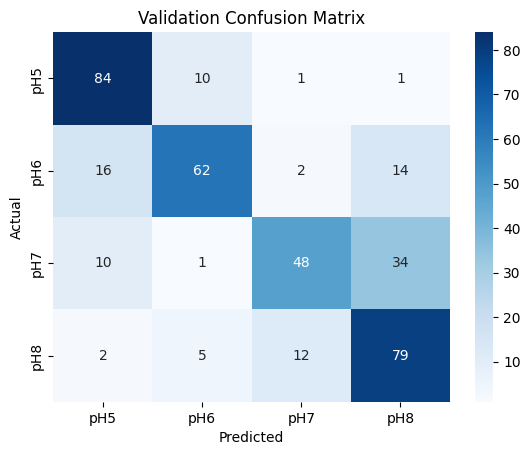


📊 Test Performance:
              precision    recall  f1-score   support

         pH5       0.76      0.95      0.84        99
         pH6       0.88      0.74      0.81        98
         pH7       0.89      0.72      0.80        94
         pH8       0.79      0.85      0.82        99

    accuracy                           0.82       390
   macro avg       0.83      0.82      0.82       390
weighted avg       0.83      0.82      0.82       390



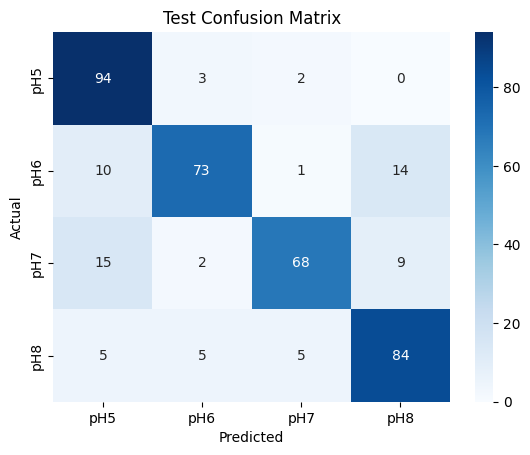


🔍 Extracting features for Random Forest...


/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: Error(s) in loading state_dict for ResNet:
	Unexpected key(s) in state_dict: "fc.weight", "fc.bias". 

In [8]:
import os
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuration
data_dir = "Split_Data"  # Your dataset path
batch_size = 32
num_epochs = 15
num_classes = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Helper to load all time points together
def load_combined_dataset(split):
    datasets_list = []
    split_path = os.path.join(data_dir, split)
    for time_point in os.listdir(split_path):
        time_path = os.path.join(split_path, time_point)
        if os.path.isdir(time_path):
            ds = datasets.ImageFolder(time_path, transform=transform)
            datasets_list.append(ds)
    return torch.utils.data.ConcatDataset(datasets_list)

# Load datasets
train_dataset = load_combined_dataset("train")
val_dataset = load_combined_dataset("val")
test_dataset = load_combined_dataset("test")

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Model setup
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss, correct = 0.0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    acc = correct / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {total_loss:.4f}, Accuracy: {acc:.4f}")

# Evaluation function
def evaluate(loader, split_name):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            preds = outputs.argmax(1).cpu()
            all_preds.extend(preds)
            all_labels.extend(labels)

    print(f"\n📊 {split_name} Performance:")
    print(classification_report(all_labels, all_preds, target_names=["pH5", "pH6", "pH7", "pH8"]))

    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=["pH5", "pH6", "pH7", "pH8"],
                yticklabels=["pH5", "pH6", "pH7", "pH8"], cmap="Blues")
    plt.title(f"{split_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Final evaluation
evaluate(val_loader, "Validation")
evaluate(test_loader, "Test")

# ----------------------------------
# 🔁 RANDOM FOREST USING RESNET FEATURES
# ----------------------------------
print("\n🔍 Extracting features for Random Forest...")

# Remove the FC layer from trained model
feature_extractor = models.resnet18(pretrained=True)
feature_extractor.fc = nn.Identity()
feature_extractor.load_state_dict(model.state_dict())  # Use trained weights
feature_extractor = feature_extractor.to(device)
feature_extractor.eval()

# Feature extraction
def extract_features(dataloader):
    features, labels = [], []
    with torch.no_grad():
        for images, lbls in dataloader:
            images = images.to(device)
            feats = feature_extractor(images).cpu().numpy()
            features.extend(feats)
            labels.extend(lbls.numpy())
    return np.array(features), np.array(labels)

X_train_rf, y_train_rf = extract_features(train_loader)
X_val_rf, y_val_rf = extract_features(val_loader)
X_test_rf, y_test_rf = extract_features(test_loader)

# Flatten features (ResNet18 output shape: (batch, 512, 1, 1) or (batch, 512))
X_train_rf = X_train_rf.reshape(X_train_rf.shape[0], -1)
X_val_rf = X_val_rf.reshape(X_val_rf.shape[0], -1)
X_test_rf = X_test_rf.reshape(X_test_rf.shape[0], -1)

# Train Random Forest
print("🌲 Training Random Forest on extracted features...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Evaluate RF
def evaluate_rf(X, y, split_name):
    preds = rf.predict(X)
    print(f"\n🌲 RF - {split_name} Performance:")
    print(classification_report(y, preds, target_names=["pH5", "pH6", "pH7", "pH8"]))

    cm = confusion_matrix(y, preds)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=["pH5", "pH6", "pH7", "pH8"],
                yticklabels=["pH5", "pH6", "pH7", "pH8"], cmap="Greens")
    plt.title(f"RF {split_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_rf(X_val_rf, y_val_rf, "Validation")
evaluate_rf(X_test_rf, y_test_rf, "Test")

## MLP


🧠 Training MLP...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

✅ Best MLP Params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 64), 'learning_rate': 'constant', 'solver': 'adam'}

🔍 MLP Validation:
              precision    recall  f1-score   support

           5       0.88      0.89      0.88        63
           6       0.83      0.74      0.78        66
           7       0.76      0.62      0.68        61
           8       0.59      0.83      0.69        41

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.77      0.77       231

✅ Validation Accuracy: 0.7662337662337663

📊 MLP Test:
              precision    recall  f1-score   support

           5       0.84      0.86      0.85        72
           6       0.77      0.71      0.74        62
           7       0.55      0.58      0.57        67
           8       0.70      0.69      0.70        88

    accuracy                           0.71       289
   macro avg       0.72     

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


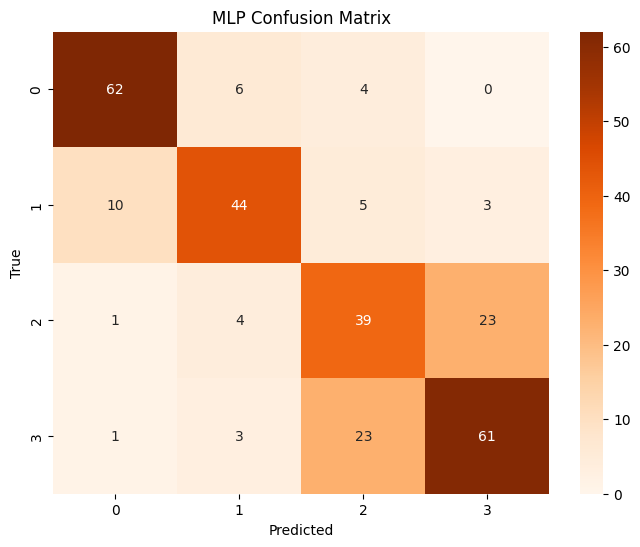

In [9]:
import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------- Feature Extraction ---------------------
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# --------------------- Load Data ---------------------
main_dir = "Split_Data"
data = []
labels = []

for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)
                match = re.search(r'pH(\d+)', file)
                if match:
                    pH = int(match.group(1))
                    features = extract_features(full_path)
                    if features is not None:
                        data.append(features)
                        labels.append(pH)
                else:
                    print(f"Could not extract pH from: {file}")

X = np.array(data)
y = np.array(labels)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# --------------------- Helper for Evaluation ---------------------
def evaluate_model(name, model, X_val, y_val, X_test, y_test, cmap='viridis'):
    print(f"\n🔍 {name} Validation:")
    val_preds = model.predict(X_val)
    print(classification_report(y_val, val_preds))
    print("✅ Validation Accuracy:", accuracy_score(y_val, val_preds))

    print(f"\n📊 {name} Test:")
    test_preds = model.predict(X_test)
    print(classification_report(y_test, test_preds))
    print("✅ Test Accuracy:", accuracy_score(y_test, test_preds))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, fmt='d', cmap=cmap)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# --------------------- Multi-Layer Perceptron ---------------------
print("\n🧠 Training MLP...")
param_grid_mlp = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}
grid_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid_mlp, cv=3, n_jobs=-1, verbose=1)
grid_mlp.fit(X_train, y_train)
best_mlp = grid_mlp.best_estimator_
print(f"✅ Best MLP Params: {grid_mlp.best_params_}")
evaluate_model("MLP", best_mlp, X_val, y_val, X_test, y_test, cmap="Oranges")